In [71]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [72]:
import pandas as pd
import matplotlib as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sourceFile = pd.read_csv("train.csv") #read the file where we analyze the data

sourceFile.columns #output all variable names


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

By looking at the detailed information in _data_description.txt_ we can filter the variables into a smaller and more meaningful list to aid in our calculation :
- 'OverallQual' ( albeit being too general )
- 'OverallCond' ( also quite general )
- 'YearBuilt'
- 'GrLivArea'
- 'MSZoning'

# Analyzing SalePrice and its distribution

In [73]:
sourceFile['SalePrice'].describe() #output the number of unique prices, their mean and standard deviation for further analyzing

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 As we can see, there is a sizeable difference between the minimum and maximum values for SalePrice, which might influence our calculations in a wrong way. These "out of place" values are called _outliers_ and we will get to them later.

Now we want to observe how the distribution graph looks like and find out whether the Skewness and Kurtosis is positive or negative.

Skewness is : 1.8828757597682129
Kurtosis is : 6.536281860064529


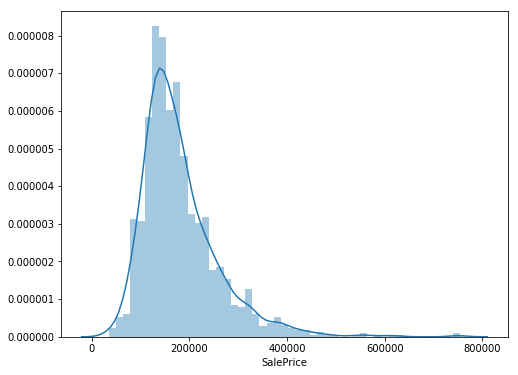

In [74]:
f, ax = plt.pyplot.subplots(figsize=(8, 6))
sbn.distplot(sourceFile['SalePrice']);
print("Skewness is :", sourceFile['SalePrice'].skew())
print("Kurtosis is :", sourceFile['SalePrice'].kurt())

A positive skewness implies that the values deviate from normal distribution and they tend to be closer to the lower bound, additionally a higher than normal kurtosis shows that that distribution has a very sharp peak thus the long tail extends beyond the mean by a few standard deviations.
Therefore we can conclude that a vast majority of houses are priced at 180921± one standard deviation ( which in our case is ~79442).

# Observing the correlation between our filtered variables and SalePrice

## Numerical variables

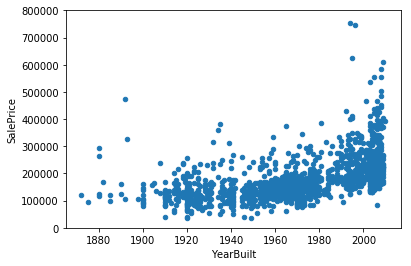

In [75]:
#scatter plot of YearBuilt/SalePrice
var = "YearBuilt"
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim= (0,800000));

At a first glance we can see a weak linear relationship between the two values, additionally it seems that a vast majority of our houses are built after the '50s.

Next up is 'GrLivArea'.

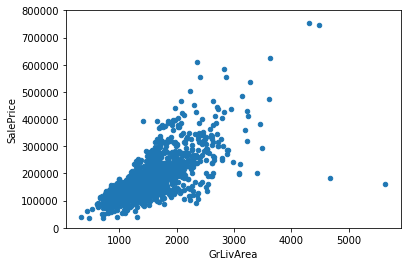

In [76]:
#scatter plot of GrLivArea/SalePrice
var = "GrLivArea"
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim= (0,800000));

On the other hand, the relationship between _GrLivArea_ and _SalePrice_ denotes a strong linearity, thus this variable has a stronger impact on our sale price.

## Categorical Values

First up is _OverallQual_.

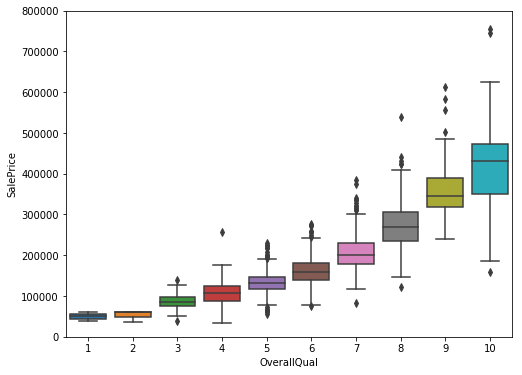

In [77]:
var = "OverallQual"
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
f, ax = plt.pyplot.subplots(figsize=(8, 6))
box = sbn.boxplot(x= var, y = 'SalePrice', data = data)
box.axis(ymin = 0, ymax = 800000);

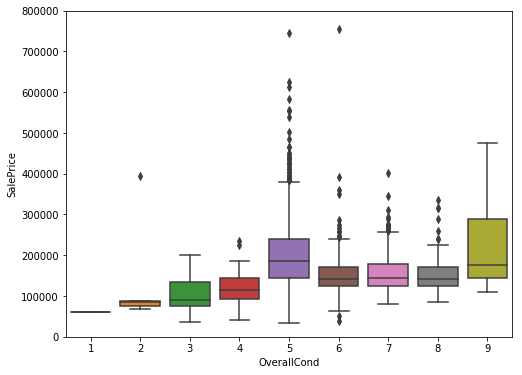

In [78]:
var = "OverallCond"
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
f, ax = plt.pyplot.subplots(figsize=(8, 6))
box = sbn.boxplot(x= var, y = 'SalePrice', data = data)
box.axis(ymin = 0, ymax = 800000);

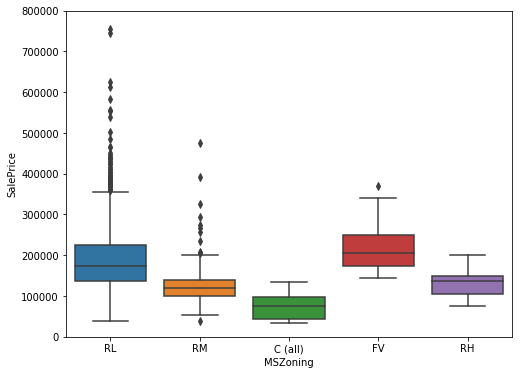

In [79]:
var = "MSZoning"
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
f, ax = plt.pyplot.subplots(figsize=(8, 6))
box = sbn.boxplot(x= var, y = 'SalePrice', data = data)
box.axis(ymin = 0, ymax = 800000);

# Observing the correlation between all variables

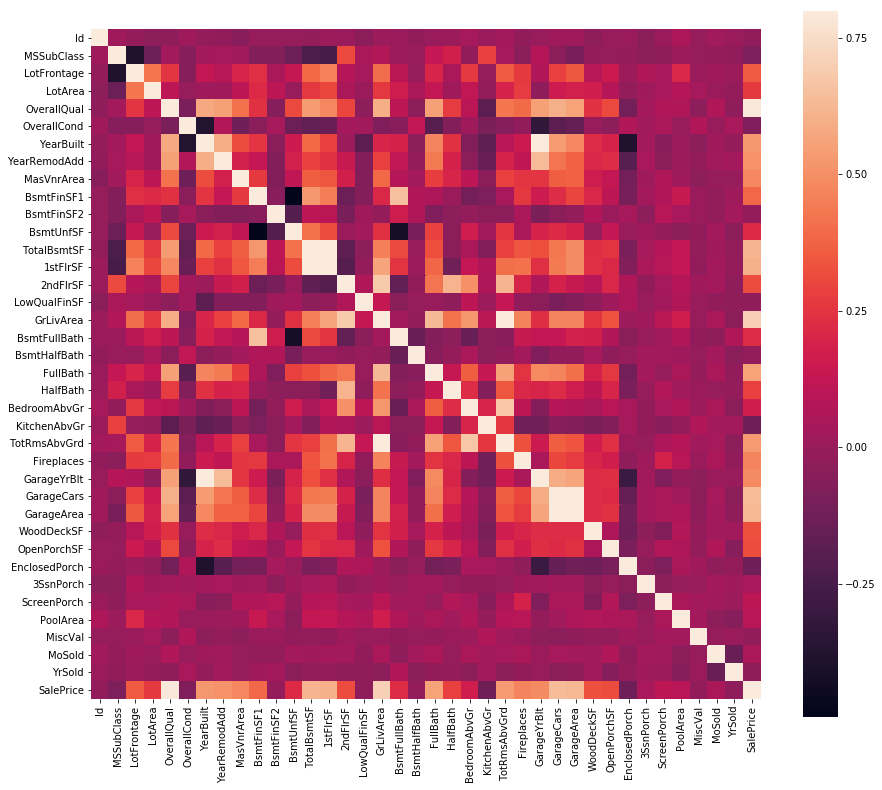

In [80]:
corrdata = sourceFile.corr()
f, ax = plt.pyplot.subplots(figsize=(15, 13))
sbn.heatmap(corrdata,square = True, vmax = 0.8);